<a href="https://colab.research.google.com/github/KafilatAdeleke/Data_Science/blob/master/Nigerian_soups_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 !pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [ ]:
 from fastbook import *
from fastai.vision.widgets import *

In [ ]:
 key = 'b97246237e3f4c5d9f9c4c2202ad14f6'

In [ ]:
 search_images_bing

<function fastbook.search_images_bing>

In [ ]:
 soup_types = 'egusi','okra','gbegiri'
path = Path('soup')

In [ ]:
 if not path.exists():
    path.mkdir()
    for o in soup_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} soup')
        download_images(dest, urls=results.attrgot('content_url'))

In [ ]:
 fns = get_image_files(path)
fns

(#448) [Path('soup/gbegiri/00000043.jpg'),Path('soup/gbegiri/00000145.jpg'),Path('soup/gbegiri/00000096.jpg'),Path('soup/gbegiri/00000037.jpg'),Path('soup/gbegiri/00000141.jpg'),Path('soup/gbegiri/00000121.jpg'),Path('soup/gbegiri/00000109.jpg'),Path('soup/gbegiri/00000058.jpg'),Path('soup/gbegiri/00000131.jpeg'),Path('soup/gbegiri/00000021.jpg')...]

In [ ]:
 failed = verify_images(fns)
failed

(#8) [Path('soup/gbegiri/00000111.jpg'),Path('soup/gbegiri/00000014.jpg'),Path('soup/egusi/00000121.jpg'),Path('soup/egusi/00000013.jpg'),Path('soup/egusi/00000101.jpg'),Path('soup/egusi/00000089.jpg'),Path('soup/egusi/00000113.jpg'),Path('soup/egusi/00000023.jpg')]

In [ ]:
 failed.map(Path.unlink);

In [ ]:
 soups = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [ ]:
 dls = soups.dataloaders(path)

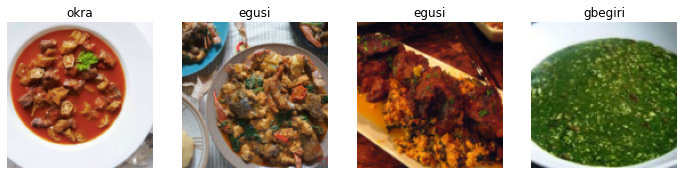

In [ ]:
 dls.valid.show_batch(max_n=4, nrows=1)

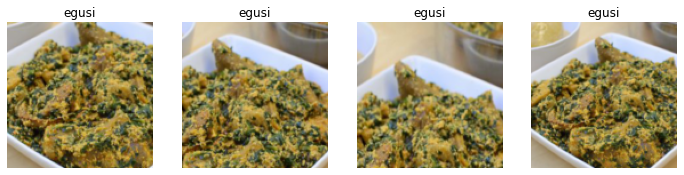

In [ ]:
soups= soups.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = soups.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

In [ ]:
 soups = soups.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = soups.dataloaders(path)

In [ ]:
 learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

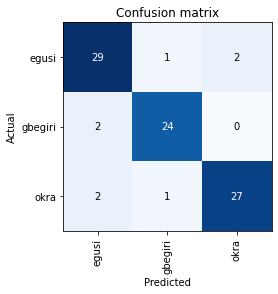

In [ ]:
 interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

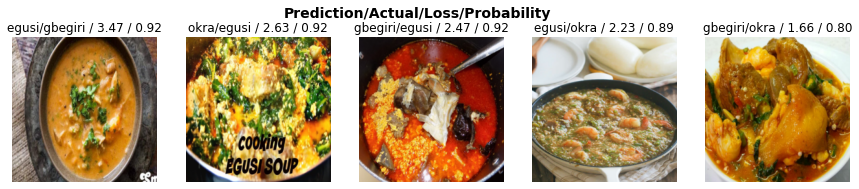

In [ ]:
 interp.plot_top_losses(5, nrows=1)

In [ ]:
 cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
#for idx in cleaner.delete(): cleaner.fns[idx].unlink()

In [ ]:
learn.export()

In [ ]:
# check if the path exists
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]